##**Obtenção das bases de imagens:**
*Baixar as imagens de teste diretamente do github*

*Obs.: Desta forma as imagens ficarão disponíveis somente enquanto esta sessão permanecer ativa ou até que o usuário  clique em no menu: Runtime>Factory reset runtime*

In [ ]:
!git clone https://github.com/guimota-uerj/TestImages.git
!pwd
!ls

Cloning into 'TestImages'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 89 (delta 16), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (89/89), done.
/content
sample_data  TestImages


*Entrar na pasta da imagem de teste utilizada*

In [ ]:
%cd /content/TestImages/Morphology/
!ls

/content/TestImages/Morphology
Pontilhismo2.png  Pontilhismo.png


# **Questão:**

\

O filtro morfolóógico top-hat negro é dado pela seguinte expressão:

\

$ T_b (f) = f \;\; \mathbf{fec}\; \; B \;-\; f $

\

Esta operação retorna uma imagem contendo os objetos contíguos que:

 *   São menores que o elemento estrurturante $B$, e
 *   que também são mais escuros que seu entorno.

\

A imagem de teste Pontilhismo2.png contém círculos de cor preta em de três tamnnhos distintos: 20 x 20; 60 x 60 e 100 x 100.

Complete o código a seguir e analise os resultados obtidos:

1. nas linhas 9-11 inclua o código do filtro black top hat

2. modifique o código da linha 36 para produzir a segmentação somente dos círculos de diâmetro 60 x 60 (você pode usar o operador ou-exclusivo ^ para isso).

3. na linha 42, modifique o código para produzir a segmentação somente dos círculos de diâmetro 100 x 100 (você pode usar o operador ou-exclusivo ^ para isso).

Utilize a célula após o código para explicar sua solução. Inclua também uma análise da pós-segmentação apresentada nas linhas 13 e 14 do código original.



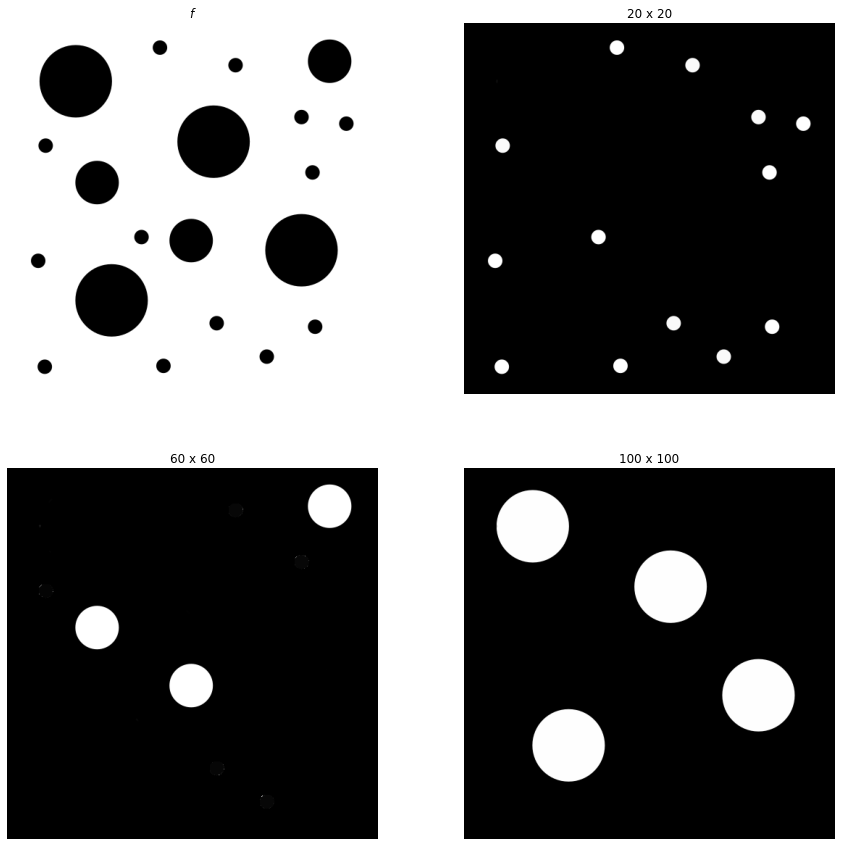

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


def BlackTopHat_HoleDetection( f, B_Size ):
  B = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, B_Size)
  # fonte: https://docs.opencv.org/trunk/d9/d61/tutorial_py_morphological_ops.html

  toph = cv2.morphologyEx (f,cv2.MORPH_BLACKHAT, B)

  # no código a seguir a operação de abertura é usada para eliminar elementos pequenos persistentes oriundos das bordas dos círculos
  Baux = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
  T = cv2.morphologyEx (toph, cv2.MORPH_OPEN, Baux)
  Topen = cv2.dilate(cv2.erode(T,Baux,iterations = 1), Baux, iterations = 1)
  return Topen

f = cv2.imread('Pontilhismo2.png',0)

plt.figure(figsize = (15,15))

plt.subplot(2,2,1)
plt.title('$f$')
plt.axis('off')
plt.imshow(f, cmap = 'gray')

plt.subplot(2,2,2)
plt.title('20 x 20')
plt.axis('off')
plt.imshow(BlackTopHat_HoleDetection( f, (20,20)) , cmap = 'gray')

plt.subplot(2,2,3)
plt.title('60 x 60')
plt.axis('off')
#modifique a linha a seguir para apresentar somente os círculos de 60 x 60
plt.imshow( BlackTopHat_HoleDetection( f, (60,60))^BlackTopHat_HoleDetection( f, (20,20)) , cmap = 'gray')

plt.subplot(2,2,4)
plt.title('100 x 100')
plt.axis('off')
#modifique a linha a seguir para apresentar somente os círculos de 100 x 100
plt.imshow(BlackTopHat_HoleDetection( f, (100,100))^BlackTopHat_HoleDetection( f, (60,60)) , cmap = 'gray')

# Discussão de resultados

**Operações Morfológicas** são operações que trabalham com a forma da imagem. Essas operações manipulam a imagem de entrada usando tipos específicos de vizinhança, chamados de *elementos estruturantes*. Cada elemento estruturante é singular, e varia de operação para operação afetando de formas diferentes uma mesma imagem. Isso não quer dizer que não existam padrões com que essas operações afetam uma imagem. Tipos diferentes de operações, como dilatação e erosão por exemplo, possuem formas específicas de gerar uma imagem final, onde essa imagem varia de elemento resultante para elemento resultante. Em resumo, uma imagem pode sofrer um tipo de operação morfológica por *n* elementos estruturantes distintos em que cada imagem de saída é diferenciável da outra.

Para este exercício deve se entender os processos de *erosão* e *dilatação* exemplificados. A erosão realiza a subtração de Minkowski, ou seja, uma interseção baseada no elemento estruturante. Basicamente, quando trabalhando com uma imagem binária por exemplo, o elemento estruturante passa sobre a imagem de forma que o pixel da imagem vai ser 'aceso' se todos os pixels sobre essa vizinhança estejam presentes na mesma, do contrário o pixel é 'apagado' e não aparece na imagem de saída, logo, sofrendo erosão. Já o processo de dilatação realiza o oposto, usando a adição de Minkowski, ele utiliza de uma união baseada no elemento estruturante . Logo, todo e qualquer pixel em comum com a vizinhança ficará 'aceso'.

O processo de erosão pode ser usado para eliminação de ruídos de uma imagem, porém tem como efeito também a diminuição do objeto destacado na imagem devido a perda dos pixels em suas bordas, enquanto a dilatação, como o próprio nome diz, dilata (ou aumenta) qualquer objeto da imagem, incluindo ruídos.

Considerando a imagem original percebe-se que os objetos da mesma são circulares e portanto devem ser trabalhados com um elemento estruturante específico, nesse caso elpsoidal. O que acontece neste exercício é um processo morfológico de *abertura* em que ocorre erosão, onde é eliminado o ruído e em seguida é aplicado um processo de dilatação que aumenta o objeto, "restaurando" seu tamanho de volta ao original sem reaparecimento dos ruídos previamente eliminados. Isso é claramente visível em todos os resultados apresentados, onde suas cores são invertidas devido ao comando black top hat executado no algoritmo. Para cada imagem acontece uma distinção de todos os pixels descartados na imagem original pela operação morfológica de abertura com o Black Top Hat, em que a visulização do resultado varia de acordo com os parâmetros (20x20, 60x60 e 100x100). Vale notar que normalmente todos os objetos de diâmetros menores, como 20x20 para 60x60 ou 20x20 e 60x60 para 100x100 apareceriam na imagem de saída, contudo para focar somente nos objetos dos tamanhos determinados foi executado em conjunto ao comando inicial, um secundário que exclui qualquer objeto menor do que o especificado. Apresentando assim tudo fora desses parâmetros como ruído, e por tanto não exibindo-os.



